#Step 5
Optimization with uncertain graph weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.UCBLearner5 import UCBLearner5
from Code.TSLearner5 import TSLearner5

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 150
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 5

In [4]:
#unknown param

customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))
    customer.set_probability_click(np.ones((n_products,n_products)))

UCB

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb5_learner = UCBLearner5(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb5_learner.select_superarm()
        report = environment.round(super_arm)
        ucb5_learner.update(super_arm.copy(), report)
    rewards = ucb5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[[0.         0.18181818 0.         0.         0.        ]
 [0.42105263 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]]
[[0.         0.25       0.         0.         0.        ]
 [0.4        0.         0.         0.         0.        ]
 [0.625      0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.44444444 0.         0.         0.         0.        ]]
[[0.         0.20588235 0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.03030303]
 [0.5        0.         0.         0.05555556 0.        ]
 [0.5        0.         0.         0.         0.        ]
 [0.40909091 0.         0.         0.         0.        ]]
[[0.         0.20588235 0.         0.         0.        ]
 [0.3921

[[0.         0.23196881 0.         0.         0.        ]
 [0.46582278 0.         0.         0.         0.03544304]
 [0.44670051 0.         0.         0.12690355 0.        ]
 [0.57926829 0.         0.04268293 0.         0.        ]
 [0.43820225 0.         0.         0.         0.        ]]
[[0.         0.23091248 0.         0.         0.        ]
 [0.47317073 0.         0.         0.         0.03414634]
 [0.4375     0.         0.         0.125      0.        ]
 [0.57941176 0.         0.04411765 0.         0.        ]
 [0.43406593 0.         0.         0.         0.        ]]
loading: [===                           ] 10.0%
[[0.         0.23655914 0.         0.         0.        ]
 [0.47183099 0.         0.         0.         0.03286385]
 [0.43255814 0.         0.         0.1255814  0.        ]
 [0.58119658 0.         0.04273504 0.         0.        ]
 [0.43650794 0.         0.         0.         0.        ]]
[[0.         0.23344948 0.         0.         0.        ]
 [0.4785553  0.      

[[0.         0.2654321  0.         0.         0.        ]
 [0.48780488 0.         0.         0.         0.02682927]
 [0.43176179 0.         0.         0.11166253 0.        ]
 [0.58547655 0.         0.04236006 0.         0.        ]
 [0.44016506 0.         0.         0.         0.        ]]
[[0.         0.26672459 0.         0.         0.        ]
 [0.48862275 0.         0.         0.         0.02634731]
 [0.43645084 0.         0.         0.11270983 0.        ]
 [0.58547655 0.         0.04236006 0.         0.        ]
 [0.43572395 0.         0.         0.         0.        ]]
[[0.         0.26791809 0.         0.         0.        ]
 [0.4947245  0.         0.         0.         0.02579132]
 [0.42957746 0.         0.         0.11267606 0.        ]
 [0.58666667 0.         0.04148148 0.         0.        ]
 [0.43576159 0.         0.         0.         0.        ]]
[[0.         0.27067669 0.         0.         0.        ]
 [0.49367089 0.         0.         0.         0.02761795]
 [0.4288990

[[0.         0.27096058 0.         0.         0.        ]
 [0.485623   0.         0.         0.         0.03115016]
 [0.42835821 0.         0.         0.12238806 0.        ]
 [0.58317025 0.         0.03522505 0.         0.        ]
 [0.44940747 0.         0.         0.         0.        ]]
[[0.         0.26874658 0.         0.         0.        ]
 [0.48544453 0.         0.         0.         0.03147128]
 [0.42794118 0.         0.         0.12647059 0.        ]
 [0.58389262 0.         0.03451582 0.         0.        ]
 [0.45085663 0.         0.         0.         0.        ]]
[[0.         0.27012426 0.         0.         0.        ]
 [0.48447205 0.         0.         0.         0.0310559 ]
 [0.42898135 0.         0.         0.1276901  0.        ]
 [0.58199052 0.         0.03507109 0.         0.        ]
 [0.45040214 0.         0.         0.         0.        ]]
[[0.         0.27136752 0.         0.         0.        ]
 [0.48228043 0.         0.         0.         0.03158706]
 [0.4297872

[[0.         0.28211382 0.         0.         0.        ]
 [0.49066827 0.         0.         0.         0.03070439]
 [0.4195279  0.         0.         0.13304721 0.        ]
 [0.59235669 0.         0.03326256 0.         0.        ]
 [0.44647696 0.         0.         0.         0.        ]]
[[0.         0.2821443  0.         0.         0.        ]
 [0.48926014 0.         0.         0.         0.03162291]
 [0.4212766  0.         0.         0.13297872 0.        ]
 [0.59170766 0.         0.03302881 0.         0.        ]
 [0.44295302 0.         0.         0.         0.        ]]
[[0.         0.2832     0.         0.         0.        ]
 [0.48846836 0.         0.         0.         0.0313424 ]
 [0.42060988 0.         0.         0.13144059 0.        ]
 [0.59259259 0.         0.03284416 0.         0.        ]
 [0.44274301 0.         0.         0.         0.        ]]
[[0.         0.28344581 0.         0.         0.        ]
 [0.48800468 0.         0.         0.         0.03101229]
 [0.4223149

[[0.         0.27826087 0.         0.         0.        ]
 [0.49904853 0.         0.         0.         0.03187441]
 [0.41841004 0.         0.         0.13305439 0.        ]
 [0.58422535 0.         0.03661972 0.         0.        ]
 [0.43719144 0.         0.         0.         0.        ]]
[[0.         0.27784891 0.         0.         0.        ]
 [0.49882242 0.         0.         0.         0.03155911]
 [0.41825726 0.         0.         0.13278008 0.        ]
 [0.58412521 0.         0.03689212 0.         0.        ]
 [0.43681917 0.         0.         0.         0.        ]]
[[0.         0.27765452 0.         0.         0.        ]
 [0.49836678 0.         0.         0.         0.03173122]
 [0.41618497 0.         0.         0.13294798 0.        ]
 [0.58573009 0.         0.03761062 0.         0.        ]
 [0.43783784 0.         0.         0.         0.        ]]
[[0.         0.27769062 0.         0.         0.        ]
 [0.49953832 0.         0.         0.         0.03139428]
 [0.4168714

[[0.         0.2794899  0.         0.         0.        ]
 [0.50437202 0.         0.         0.         0.03100159]
 [0.40609841 0.         0.         0.13305613 0.        ]
 [0.58298466 0.         0.0395165  0.         0.        ]
 [0.43980009 0.         0.         0.         0.        ]]
[[0.         0.27914354 0.         0.         0.        ]
 [0.50493097 0.         0.         0.         0.03076923]
 [0.40676796 0.         0.         0.13328729 0.        ]
 [0.58337182 0.         0.03926097 0.         0.        ]
 [0.43857272 0.         0.         0.         0.        ]]
loading: [=================             ] 56.7%
[[0.         0.27966325 0.         0.         0.        ]
 [0.50511408 0.         0.         0.         0.0306845 ]
 [0.4062069  0.         0.         0.13310345 0.        ]
 [0.58310376 0.         0.03948577 0.         0.        ]
 [0.43735968 0.         0.         0.         0.        ]]
[[0.         0.27981172 0.         0.         0.        ]
 [0.5043036  0.      

[[0.         0.28134903 0.         0.         0.        ]
 [0.5013587  0.         0.         0.         0.0298913 ]
 [0.40434272 0.         0.         0.13204225 0.        ]
 [0.58287074 0.         0.04004758 0.         0.        ]
 [0.43401308 0.         0.         0.         0.        ]]
[[0.         0.28104575 0.         0.         0.        ]
 [0.50101488 0.         0.         0.         0.02976996]
 [0.40302854 0.         0.         0.13278975 0.        ]
 [0.58287293 0.         0.04025257 0.         0.        ]
 [0.43360122 0.         0.         0.         0.        ]]
[[0.         0.28096948 0.         0.         0.        ]
 [0.50100874 0.         0.         0.         0.02958978]
 [0.40289855 0.         0.         0.13217391 0.        ]
 [0.58215409 0.         0.04048742 0.         0.        ]
 [0.43433574 0.         0.         0.         0.        ]]
[[0.         0.28232662 0.         0.         0.        ]
 [0.50283996 0.         0.         0.         0.02973605]
 [0.4026574

[[0.         0.28498327 0.         0.         0.        ]
 [0.50265957 0.         0.         0.         0.02836879]
 [0.40437436 0.         0.         0.13377416 0.        ]
 [0.58479944 0.         0.04081633 0.         0.        ]
 [0.43908969 0.         0.         0.         0.        ]]
[[0.         0.28490196 0.         0.         0.        ]
 [0.50235294 0.         0.         0.         0.02823529]
 [0.40567951 0.         0.         0.13336714 0.        ]
 [0.5840925  0.         0.04099509 0.         0.        ]
 [0.43808256 0.         0.         0.         0.        ]]
[[0.         0.28473849 0.         0.         0.        ]
 [0.50190337 0.         0.         0.         0.02811127]
 [0.40596562 0.         0.         0.13296259 0.        ]
 [0.58429319 0.         0.0408377  0.         0.        ]
 [0.43888705 0.         0.         0.         0.        ]]
[[0.         0.28479782 0.         0.         0.        ]
 [0.50247886 0.         0.         0.         0.0279965 ]
 [0.40625  

[[0.         0.28514196 0.         0.         0.        ]
 [0.50340314 0.         0.         0.         0.02774869]
 [0.40933333 0.         0.         0.13111111 0.        ]
 [0.58600311 0.         0.0407465  0.         0.        ]
 [0.43874221 0.         0.         0.         0.        ]]
[[0.         0.28583825 0.         0.         0.        ]
 [0.5044317  0.         0.         0.         0.02763295]
 [0.40919134 0.         0.         0.13079982 0.        ]
 [0.58596166 0.         0.04112554 0.         0.        ]
 [0.43932684 0.         0.         0.         0.        ]]
[[0.         0.28568963 0.         0.         0.        ]
 [0.50389206 0.         0.         0.         0.02750389]
 [0.4092511  0.         0.         0.130837   0.        ]
 [0.58713054 0.         0.04094828 0.         0.        ]
 [0.43911765 0.         0.         0.         0.        ]]
[[0.         0.28598452 0.         0.         0.        ]
 [0.50401243 0.         0.         0.         0.02743981]
 [0.4082528

[[0.         0.28733638 0.         0.         0.        ]
 [0.50187091 0.         0.         0.         0.02736202]
 [0.40501792 0.         0.         0.12823576 0.        ]
 [0.58515406 0.         0.04061625 0.         0.        ]
 [0.44012858 0.         0.         0.         0.        ]]
[[0.         0.28755702 0.         0.         0.        ]
 [0.50197905 0.         0.         0.         0.02747381]
 [0.4047619  0.         0.         0.12777778 0.        ]
 [0.58447361 0.         0.04077073 0.         0.        ]
 [0.43982961 0.         0.         0.         0.        ]]
[[0.         0.28761965 0.         0.         0.        ]
 [0.50220367 0.         0.         0.         0.02737184]
 [0.40522359 0.         0.         0.12781955 0.        ]
 [0.58474812 0.         0.04091289 0.         0.        ]
 [0.44002123 0.         0.         0.         0.        ]]
[[0.         0.28700954 0.         0.         0.        ]
 [0.50208141 0.         0.         0.         0.02728955]
 [0.4049782

[[0.         0.2027027  0.         0.         0.        ]
 [0.46428571 0.         0.         0.         0.02678571]
 [0.38461538 0.         0.         0.1025641  0.        ]
 [0.60714286 0.         0.04761905 0.         0.        ]
 [0.45333333 0.         0.         0.         0.        ]]
[[0.         0.2037037  0.         0.         0.        ]
 [0.49606299 0.         0.         0.         0.02362205]
 [0.35555556 0.         0.         0.08888889 0.        ]
 [0.57731959 0.         0.04123711 0.         0.        ]
 [0.43181818 0.         0.         0.         0.        ]]
loading: [=                             ] 3.3%
[[0.         0.19318182 0.         0.         0.        ]
 [0.49305556 0.         0.         0.         0.02083333]
 [0.34782609 0.         0.         0.08695652 0.        ]
 [0.57272727 0.         0.03636364 0.         0.        ]
 [0.45454545 0.         0.         0.         0.        ]]
[[0.         0.20588235 0.         0.         0.        ]
 [0.47402597 0.       

[[0.         0.24697987 0.         0.         0.        ]
 [0.45625    0.         0.         0.         0.03125   ]
 [0.36099585 0.         0.         0.11618257 0.        ]
 [0.6127451  0.         0.04656863 0.         0.        ]
 [0.46336207 0.         0.         0.         0.        ]]
[[0.         0.24901704 0.         0.         0.        ]
 [0.45766129 0.         0.         0.         0.03024194]
 [0.37450199 0.         0.         0.11553785 0.        ]
 [0.61463415 0.         0.04634146 0.         0.        ]
 [0.46526316 0.         0.         0.         0.        ]]
[[0.         0.24808184 0.         0.         0.        ]
 [0.46047431 0.         0.         0.         0.02964427]
 [0.375      0.         0.         0.11742424 0.        ]
 [0.6206089  0.         0.04918033 0.         0.        ]
 [0.46526316 0.         0.         0.         0.        ]]
[[0.         0.24598269 0.         0.         0.        ]
 [0.4559387  0.         0.         0.         0.02873563]
 [0.3791821

[[0.         0.24685883 0.         0.         0.        ]
 [0.47327394 0.         0.         0.         0.03229399]
 [0.37330317 0.         0.         0.11312217 0.        ]
 [0.59893048 0.         0.05080214 0.         0.        ]
 [0.46489104 0.         0.         0.         0.        ]]
[[0.         0.2494577  0.         0.         0.        ]
 [0.47489083 0.         0.         0.         0.03275109]
 [0.37053571 0.         0.         0.11383929 0.        ]
 [0.60446781 0.         0.05124836 0.         0.        ]
 [0.46199525 0.         0.         0.         0.        ]]
[[0.         0.25       0.         0.         0.        ]
 [0.47430407 0.         0.         0.         0.03211991]
 [0.37582418 0.         0.         0.11428571 0.        ]
 [0.60154242 0.         0.05012853 0.         0.        ]
 [0.46378505 0.         0.         0.         0.        ]]
[[0.         0.25209497 0.         0.         0.        ]
 [0.47643979 0.         0.         0.         0.03141361]
 [0.3758241

[[0.         0.25856079 0.         0.         0.        ]
 [0.47293233 0.         0.         0.         0.02781955]
 [0.38438438 0.         0.         0.13363363 0.        ]
 [0.58844444 0.         0.04977778 0.         0.        ]
 [0.45975104 0.         0.         0.         0.        ]]
[[0.         0.2596577  0.         0.         0.        ]
 [0.47391952 0.         0.         0.         0.02757079]
 [0.38404727 0.         0.         0.13146233 0.        ]
 [0.59019264 0.         0.05166375 0.         0.        ]
 [0.45819672 0.         0.         0.         0.        ]]
[[0.         0.261079   0.         0.         0.        ]
 [0.47507331 0.         0.         0.         0.02785924]
 [0.38405797 0.         0.         0.13478261 0.        ]
 [0.59102675 0.         0.05263158 0.         0.        ]
 [0.45961228 0.         0.         0.         0.        ]]
[[0.         0.25940029 0.         0.         0.        ]
 [0.4764322  0.         0.         0.         0.0275562 ]
 [0.3900709

[[0.         0.27194299 0.         0.         0.        ]
 [0.4738323  0.         0.         0.         0.02701182]
 [0.38461538 0.         0.         0.13542795 0.        ]
 [0.59093937 0.         0.05463025 0.         0.        ]
 [0.45208071 0.         0.         0.         0.        ]]
[[0.         0.27222016 0.         0.         0.        ]
 [0.47344885 0.         0.         0.         0.02683063]
 [0.38469828 0.         0.         0.13469828 0.        ]
 [0.58932103 0.         0.05471325 0.         0.        ]
 [0.4525593  0.         0.         0.         0.        ]]
[[0.         0.27316176 0.         0.         0.        ]
 [0.47368421 0.         0.         0.         0.02714681]
 [0.38420491 0.         0.         0.13447172 0.        ]
 [0.58942559 0.         0.05483029 0.         0.        ]
 [0.45201238 0.         0.         0.         0.        ]]
[[0.         0.27348871 0.         0.         0.        ]
 [0.47368421 0.         0.         0.         0.02796053]
 [0.3824152

[[0.         0.28014397 0.         0.         0.        ]
 [0.47158837 0.         0.         0.         0.02818792]
 [0.38147833 0.         0.         0.13763806 0.        ]
 [0.58807877 0.         0.0521554  0.         0.        ]
 [0.44343891 0.         0.         0.         0.        ]]
[[0.         0.27979738 0.         0.         0.        ]
 [0.47158082 0.         0.         0.         0.02797513]
 [0.37951301 0.         0.         0.13685978 0.        ]
 [0.58898305 0.         0.05190678 0.         0.        ]
 [0.44294294 0.         0.         0.         0.        ]]
loading: [===============               ] 50.0%
[[0.         0.2810089  0.         0.         0.        ]
 [0.46999117 0.         0.         0.         0.02780229]
 [0.37792642 0.         0.         0.13795987 0.        ]
 [0.58823529 0.         0.0519958  0.         0.        ]
 [0.44433449 0.         0.         0.         0.        ]]
[[0.         0.28234601 0.         0.         0.        ]
 [0.4700481  0.      

[[0.         0.28827691 0.         0.         0.        ]
 [0.47493502 0.         0.         0.         0.02599332]
 [0.38835616 0.         0.         0.13767123 0.        ]
 [0.58135365 0.         0.04975347 0.         0.        ]
 [0.43825869 0.         0.         0.         0.        ]]
[[0.         0.28865462 0.         0.         0.        ]
 [0.47451994 0.         0.         0.         0.02621861]
 [0.38801906 0.         0.         0.13818924 0.        ]
 [0.58058771 0.         0.04942119 0.         0.        ]
 [0.43684869 0.         0.         0.         0.        ]]
[[0.         0.28935532 0.         0.         0.        ]
 [0.47465099 0.         0.         0.         0.02681852]
 [0.38810007 0.         0.         0.13793103 0.        ]
 [0.57971656 0.         0.04960142 0.         0.        ]
 [0.43739635 0.         0.         0.         0.        ]]
[[0.         0.2889441  0.         0.         0.        ]
 [0.47370343 0.         0.         0.         0.0266618 ]
 [0.3866846

[[0.         0.29202773 0.         0.         0.        ]
 [0.47492063 0.         0.         0.         0.02730159]
 [0.38672103 0.         0.         0.13861386 0.        ]
 [0.57583944 0.         0.04862987 0.         0.        ]
 [0.44134897 0.         0.         0.         0.        ]]
[[0.         0.29265659 0.         0.         0.        ]
 [0.47492904 0.         0.         0.         0.02712078]
 [0.3873403  0.         0.         0.13821138 0.        ]
 [0.57702651 0.         0.04840569 0.         0.        ]
 [0.44241983 0.         0.         0.         0.        ]]
[[0.         0.29210583 0.         0.         0.        ]
 [0.47431078 0.         0.         0.         0.02694236]
 [0.38847262 0.         0.         0.13832853 0.        ]
 [0.57667304 0.         0.04894837 0.         0.        ]
 [0.44094203 0.         0.         0.         0.        ]]
[[0.         0.29206756 0.         0.         0.        ]
 [0.47366781 0.         0.         0.         0.02679963]
 [0.3889845

[[0.         0.29260935 0.         0.         0.        ]
 [0.47052342 0.         0.         0.         0.02589532]
 [0.39628327 0.         0.         0.13761929 0.        ]
 [0.57341001 0.         0.04905277 0.         0.        ]
 [0.44615879 0.         0.         0.         0.        ]]
[[0.         0.29250423 0.         0.         0.        ]
 [0.47018412 0.         0.         0.         0.02583127]
 [0.3963964  0.         0.         0.13713714 0.        ]
 [0.57341001 0.         0.04905277 0.         0.        ]
 [0.44725064 0.         0.         0.         0.        ]]
[[0.         0.29202546 0.         0.         0.        ]
 [0.47058824 0.         0.         0.         0.02626539]
 [0.39620758 0.         0.         0.13722555 0.        ]
 [0.57349966 0.         0.04888739 0.         0.        ]
 [0.44730977 0.         0.         0.         0.        ]]
[[0.         0.29207829 0.         0.         0.        ]
 [0.47084469 0.         0.         0.         0.02615804]
 [0.3966202

[[0.         0.29198793 0.         0.         0.        ]
 [0.46868836 0.         0.         0.         0.02687377]
 [0.39964077 0.         0.         0.14009879 0.        ]
 [0.579043   0.         0.04694125 0.         0.        ]
 [0.44390935 0.         0.         0.         0.        ]]
[[0.         0.29234881 0.         0.         0.        ]
 [0.46917219 0.         0.         0.         0.02677475]
 [0.39910714 0.         0.         0.13973214 0.        ]
 [0.57862964 0.         0.04678539 0.         0.        ]
 [0.44453853 0.         0.         0.         0.        ]]
[[0.         0.29179837 0.         0.         0.        ]
 [0.46842878 0.         0.         0.         0.02667646]
 [0.40026655 0.         0.         0.13904931 0.        ]
 [0.57769763 0.         0.04688909 0.         0.        ]
 [0.44388186 0.         0.         0.         0.        ]]
[[0.         0.29160457 0.         0.         0.        ]
 [0.46903949 0.         0.         0.         0.0265724 ]
 [0.4      

[[0.         0.29321829 0.         0.         0.        ]
 [0.47290093 0.         0.         0.         0.02598845]
 [0.39686369 0.         0.         0.14073181 0.        ]
 [0.57475356 0.         0.04627601 0.         0.        ]
 [0.44401742 0.         0.         0.         0.        ]]
[[0.         0.29280434 0.         0.         0.        ]
 [0.47278761 0.         0.         0.         0.02610619]
 [0.39686998 0.         0.         0.14044944 0.        ]
 [0.57474086 0.         0.04637207 0.         0.        ]
 [0.44447281 0.         0.         0.         0.        ]]
loading: [============================= ] 96.7%
[[0.         0.29341947 0.         0.         0.        ]
 [0.47218543 0.         0.         0.         0.02604857]
 [0.39631705 0.         0.         0.14051241 0.        ]
 [0.57531267 0.         0.04649266 0.         0.        ]
 [0.4447556  0.         0.         0.         0.        ]]
[[0.         0.29359856 0.         0.         0.        ]
 [0.4724912  0.      

[[0.         0.3024055  0.         0.         0.        ]
 [0.38219895 0.         0.         0.         0.04188482]
 [0.36363636 0.         0.         0.21212121 0.        ]
 [0.57317073 0.         0.05487805 0.         0.        ]
 [0.41062802 0.         0.         0.         0.        ]]
[[0.         0.29392971 0.         0.         0.        ]
 [0.39512195 0.         0.         0.         0.03902439]
 [0.35507246 0.         0.         0.21014493 0.        ]
 [0.56571429 0.         0.05142857 0.         0.        ]
 [0.40807175 0.         0.         0.         0.        ]]
[[0.         0.29230769 0.         0.         0.        ]
 [0.39819005 0.         0.         0.         0.0361991 ]
 [0.35416667 0.         0.         0.20138889 0.        ]
 [0.5492228  0.         0.06217617 0.         0.        ]
 [0.40833333 0.         0.         0.         0.        ]]
[[0.         0.28612717 0.         0.         0.        ]
 [0.40425532 0.         0.         0.         0.03404255]
 [0.3466666

[[0.         0.26185345 0.         0.         0.        ]
 [0.46722689 0.         0.         0.         0.02857143]
 [0.37234043 0.         0.         0.15159574 0.        ]
 [0.60473588 0.         0.05464481 0.         0.        ]
 [0.40715503 0.         0.         0.         0.        ]]
[[0.         0.26455026 0.         0.         0.        ]
 [0.4704918  0.         0.         0.         0.0295082 ]
 [0.37532808 0.         0.         0.1496063  0.        ]
 [0.60638298 0.         0.05319149 0.         0.        ]
 [0.40871022 0.         0.         0.         0.        ]]
[[0.         0.26776519 0.         0.         0.        ]
 [0.47124601 0.         0.         0.         0.02875399]
 [0.36455696 0.         0.         0.14683544 0.        ]
 [0.60585198 0.         0.05163511 0.         0.        ]
 [0.41215107 0.         0.         0.         0.        ]]
[[0.         0.26733668 0.         0.         0.        ]
 [0.47040498 0.         0.         0.         0.02803738]
 [0.3606965

[[0.         0.27129751 0.         0.         0.        ]
 [0.48026949 0.         0.         0.         0.02502406]
 [0.37055016 0.         0.         0.13430421 0.        ]
 [0.58688525 0.         0.04480874 0.         0.        ]
 [0.42634855 0.         0.         0.         0.        ]]
[[0.         0.27000651 0.         0.         0.        ]
 [0.47768281 0.         0.         0.         0.02469136]
 [0.36900958 0.         0.         0.1341853  0.        ]
 [0.58688525 0.         0.04480874 0.         0.        ]
 [0.4247697  0.         0.         0.         0.        ]]
[[0.         0.27086008 0.         0.         0.        ]
 [0.47895229 0.         0.         0.         0.02712816]
 [0.36776213 0.         0.         0.13771518 0.        ]
 [0.58502674 0.         0.04385027 0.         0.        ]
 [0.42454728 0.         0.         0.         0.        ]]
[[0.         0.26932826 0.         0.         0.        ]
 [0.47886029 0.         0.         0.         0.02665441]
 [0.3697996

[[0.         0.27226581 0.         0.         0.        ]
 [0.48879552 0.         0.         0.         0.02591036]
 [0.37887486 0.         0.         0.1423651  0.        ]
 [0.58333333 0.         0.04323899 0.         0.        ]
 [0.42062315 0.         0.         0.         0.        ]]
[[0.         0.27226581 0.         0.         0.        ]
 [0.48854962 0.         0.         0.         0.02567661]
 [0.37844037 0.         0.         0.14220183 0.        ]
 [0.58248632 0.         0.04378421 0.         0.        ]
 [0.42155425 0.         0.         0.         0.        ]]
[[0.         0.27297543 0.         0.         0.        ]
 [0.48832418 0.         0.         0.         0.0260989 ]
 [0.37981859 0.         0.         0.14058957 0.        ]
 [0.58281734 0.         0.04411765 0.         0.        ]
 [0.42185239 0.         0.         0.         0.        ]]
[[0.         0.27370787 0.         0.         0.        ]
 [0.48783784 0.         0.         0.         0.02635135]
 [0.3821871

[[0.         0.277897   0.         0.         0.        ]
 [0.48493003 0.         0.         0.         0.0285253 ]
 [0.3767061  0.         0.         0.13375796 0.        ]
 [0.58143823 0.         0.04486785 0.         0.        ]
 [0.42063037 0.         0.         0.         0.        ]]
[[0.         0.27779751 0.         0.         0.        ]
 [0.48612593 0.         0.         0.         0.02828175]
 [0.37647059 0.         0.         0.13393665 0.        ]
 [0.57840146 0.         0.04453935 0.         0.        ]
 [0.4199773  0.         0.         0.         0.        ]]
loading: [=============                 ] 43.3%
[[0.         0.27730796 0.         0.         0.        ]
 [0.48783069 0.         0.         0.         0.02804233]
 [0.37779767 0.         0.         0.13339302 0.        ]
 [0.57834241 0.         0.04476709 0.         0.        ]
 [0.41812043 0.         0.         0.         0.        ]]
[[0.         0.27694454 0.         0.         0.        ]
 [0.48792017 0.      

[[0.         0.27878788 0.         0.         0.        ]
 [0.49635974 0.         0.         0.         0.02698073]
 [0.38095238 0.         0.         0.13113553 0.        ]
 [0.58925908 0.         0.04276479 0.         0.        ]
 [0.42356241 0.         0.         0.         0.        ]]
[[0.         0.27862267 0.         0.         0.        ]
 [0.49658994 0.         0.         0.         0.02685422]
 [0.37863372 0.         0.         0.13008721 0.        ]
 [0.59088658 0.         0.04259534 0.         0.        ]
 [0.42273782 0.         0.         0.         0.        ]]
[[0.         0.27877749 0.         0.         0.        ]
 [0.49618321 0.         0.         0.         0.02671756]
 [0.37851478 0.         0.         0.13121846 0.        ]
 [0.59088658 0.         0.04259534 0.         0.        ]
 [0.42314815 0.         0.         0.         0.        ]]
[[0.         0.27856737 0.         0.         0.        ]
 [0.49726546 0.         0.         0.         0.026504  ]
 [0.3775071

[[0.         0.28000974 0.         0.         0.        ]
 [0.49376559 0.         0.         0.         0.02600641]
 [0.38237082 0.         0.         0.1343465  0.        ]
 [0.59060119 0.         0.04445385 0.         0.        ]
 [0.42423031 0.         0.         0.         0.        ]]
[[0.         0.27940111 0.         0.         0.        ]
 [0.4929078  0.         0.         0.         0.02588652]
 [0.38224638 0.         0.         0.13586957 0.        ]
 [0.5907563  0.         0.04495798 0.         0.        ]
 [0.42549801 0.         0.         0.         0.        ]]
[[0.         0.27990373 0.         0.         0.        ]
 [0.49277406 0.         0.         0.         0.02608389]
 [0.38078078 0.         0.         0.13633634 0.        ]
 [0.59104228 0.         0.04478861 0.         0.        ]
 [0.42613185 0.         0.         0.         0.        ]]
[[0.         0.28006708 0.         0.         0.        ]
 [0.4930021  0.         0.         0.         0.02624213]
 [0.3803827

[[0.         0.2804878  0.         0.         0.        ]
 [0.49324739 0.         0.         0.         0.02516882]
 [0.38186667 0.         0.         0.13546667 0.        ]
 [0.59140969 0.         0.04478708 0.         0.        ]
 [0.42569444 0.         0.         0.         0.        ]]
[[0.         0.27997489 0.         0.         0.        ]
 [0.49343912 0.         0.         0.         0.02502289]
 [0.38166311 0.         0.         0.13539446 0.        ]
 [0.59165752 0.         0.04463959 0.         0.        ]
 [0.42536282 0.         0.         0.         0.        ]]
[[0.         0.27989981 0.         0.         0.        ]
 [0.49258699 0.         0.         0.         0.02481089]
 [0.3802221  0.         0.         0.13537811 0.        ]
 [0.59155442 0.         0.04441209 0.         0.        ]
 [0.4255246  0.         0.         0.         0.        ]]
[[0.         0.28       0.         0.         0.        ]
 [0.49261381 0.         0.         0.         0.02472113]
 [0.3792740

[[0.         0.28503126 0.         0.         0.        ]
 [0.49220011 0.         0.         0.         0.02582033]
 [0.38271028 0.         0.         0.1364486  0.        ]
 [0.59146736 0.         0.04654169 0.         0.        ]
 [0.42714329 0.         0.         0.         0.        ]]
[[0.         0.28474638 0.         0.         0.        ]
 [0.49290495 0.         0.         0.         0.02597055]
 [0.38314711 0.         0.         0.13640596 0.        ]
 [0.59020619 0.         0.04639175 0.         0.        ]
 [0.4270645  0.         0.         0.         0.        ]]
[[0.         0.28469945 0.         0.         0.        ]
 [0.49254129 0.         0.         0.         0.02637187]
 [0.3836886  0.         0.         0.13670065 0.        ]
 [0.59004815 0.         0.04622793 0.         0.        ]
 [0.42612613 0.         0.         0.         0.        ]]
[[0.         0.28452187 0.         0.         0.        ]
 [0.49216883 0.         0.         0.         0.02628086]
 [0.3840110

[[0.         0.28704918 0.         0.         0.        ]
 [0.49238579 0.         0.         0.         0.0275562 ]
 [0.37702871 0.         0.         0.13483146 0.        ]
 [0.59014977 0.         0.04925115 0.         0.        ]
 [0.42563681 0.         0.         0.         0.        ]]
[[0.         0.28671671 0.         0.         0.        ]
 [0.49265591 0.         0.         0.         0.02745004]
 [0.377741   0.         0.         0.13570542 0.        ]
 [0.59064831 0.         0.04934022 0.         0.        ]
 [0.42521834 0.         0.         0.         0.        ]]
loading: [===========================   ] 90.0%
[[0.         0.28696925 0.         0.         0.        ]
 [0.49328215 0.         0.         0.         0.02735125]
 [0.37742068 0.         0.         0.13514627 0.        ]
 [0.5912346  0.         0.049556   0.         0.        ]
 [0.42518397 0.         0.         0.         0.        ]]
[[0.         0.28654687 0.         0.         0.        ]
 [0.49271555 0.      

[[0.         0.28558771 0.         0.         0.        ]
 [0.49054553 0.         0.         0.         0.02738535]
 [0.38014981 0.         0.         0.1340824  0.        ]
 [0.59060052 0.         0.05143603 0.         0.        ]
 [0.42552658 0.         0.         0.         0.        ]]
[[0.         0.28537805 0.         0.         0.        ]
 [0.49101537 0.         0.         0.         0.02771163]
 [0.38068606 0.         0.         0.1349739  0.        ]
 [0.59100364 0.         0.05122205 0.         0.        ]
 [0.42643018 0.         0.         0.         0.        ]]
[[0.         0.28487605 0.         0.         0.        ]
 [0.49181387 0.         0.         0.         0.02778975]
 [0.38034983 0.         0.         0.13472274 0.        ]
 [0.59060228 0.         0.05114226 0.         0.        ]
 [0.42533599 0.         0.         0.         0.        ]]
[[0.         0.28477499 0.         0.         0.        ]
 [0.49226804 0.         0.         0.         0.02792096]
 [0.3809347

[[0.         0.26315789 0.         0.         0.        ]
 [0.44333333 0.         0.         0.         0.01666667]
 [0.39285714 0.         0.         0.1547619  0.        ]
 [0.6048951  0.         0.04895105 0.         0.        ]
 [0.50649351 0.         0.         0.         0.        ]]
[[0.         0.26814516 0.         0.         0.        ]
 [0.44983819 0.         0.         0.         0.01618123]
 [0.39534884 0.         0.         0.15116279 0.        ]
 [0.60200669 0.         0.04682274 0.         0.        ]
 [0.50316456 0.         0.         0.         0.        ]]
[[0.         0.26577438 0.         0.         0.        ]
 [0.44444444 0.         0.         0.         0.0154321 ]
 [0.4        0.         0.         0.16111111 0.        ]
 [0.6        0.         0.04444444 0.         0.        ]
 [0.50609756 0.         0.         0.         0.        ]]
[[0.         0.26335175 0.         0.         0.        ]
 [0.44411765 0.         0.         0.         0.01470588]
 [0.4086021

[[0.         0.25915996 0.         0.         0.        ]
 [0.45348837 0.         0.         0.         0.02180233]
 [0.42579075 0.         0.         0.14841849 0.        ]
 [0.61076923 0.         0.05692308 0.         0.        ]
 [0.46508172 0.         0.         0.         0.        ]]
[[0.         0.26102293 0.         0.         0.        ]
 [0.45014245 0.         0.         0.         0.02421652]
 [0.42417062 0.         0.         0.14691943 0.        ]
 [0.6097561  0.         0.05640244 0.         0.        ]
 [0.4657933  0.         0.         0.         0.        ]]
[[0.         0.26442722 0.         0.         0.        ]
 [0.45138889 0.         0.         0.         0.02361111]
 [0.42657343 0.         0.         0.14685315 0.        ]
 [0.61127596 0.         0.05489614 0.         0.        ]
 [0.46875    0.         0.         0.         0.        ]]
[[0.         0.2652027  0.         0.         0.        ]
 [0.45108696 0.         0.         0.         0.02309783]
 [0.4269141

[[0.         0.27710843 0.         0.         0.        ]
 [0.46544182 0.         0.         0.         0.02362205]
 [0.39296188 0.         0.         0.13196481 0.        ]
 [0.6040201  0.         0.05628141 0.         0.        ]
 [0.46627566 0.         0.         0.         0.        ]]
[[0.         0.27427598 0.         0.         0.        ]
 [0.46609442 0.         0.         0.         0.0248927 ]
 [0.39367816 0.         0.         0.13793103 0.        ]
 [0.60059465 0.         0.0555005  0.         0.        ]
 [0.46442308 0.         0.         0.         0.        ]]
[[0.         0.27374302 0.         0.         0.        ]
 [0.46290051 0.         0.         0.         0.02445194]
 [0.39745403 0.         0.         0.13861386 0.        ]
 [0.59783677 0.         0.0560472  0.         0.        ]
 [0.46691871 0.         0.         0.         0.        ]]
[[0.         0.27428256 0.         0.         0.        ]
 [0.46160267 0.         0.         0.         0.02420701]
 [0.3947730

[[0.         0.28015075 0.         0.         0.        ]
 [0.46460177 0.         0.         0.         0.02591656]
 [0.38871473 0.         0.         0.13584117 0.        ]
 [0.58928571 0.         0.05803571 0.         0.        ]
 [0.45544554 0.         0.         0.         0.        ]]
loading: [===========                   ] 36.7%
[[0.         0.28049793 0.         0.         0.        ]
 [0.46404003 0.         0.         0.         0.02626642]
 [0.38819876 0.         0.         0.13457557 0.        ]
 [0.5896679  0.         0.05756458 0.         0.        ]
 [0.45600559 0.         0.         0.         0.        ]]
[[0.         0.28078818 0.         0.         0.        ]
 [0.46448425 0.         0.         0.         0.02594194]
 [0.38683128 0.         0.         0.13477366 0.        ]
 [0.59024745 0.         0.05676856 0.         0.        ]
 [0.45718232 0.         0.         0.         0.        ]]
[[0.         0.28137652 0.         0.         0.        ]
 [0.46621622 0.      

[[0.         0.28223449 0.         0.         0.        ]
 [0.47631048 0.         0.         0.         0.02671371]
 [0.3874477  0.         0.         0.13891213 0.        ]
 [0.58009153 0.         0.05491991 0.         0.        ]
 [0.45504386 0.         0.         0.         0.        ]]
[[0.         0.28198518 0.         0.         0.        ]
 [0.47592778 0.         0.         0.         0.02657974]
 [0.38787375 0.         0.         0.14119601 0.        ]
 [0.57912649 0.         0.05445264 0.         0.        ]
 [0.45375408 0.         0.         0.         0.        ]]
[[0.         0.28210863 0.         0.         0.        ]
 [0.47407777 0.         0.         0.         0.02741775]
 [0.38824503 0.         0.         0.14155629 0.        ]
 [0.57995495 0.         0.05405405 0.         0.        ]
 [0.45493794 0.         0.         0.         0.        ]]
loading: [==============                ] 46.7%
[[0.         0.28331218 0.         0.         0.        ]
 [0.47350173 0.      

[[0.         0.28713939 0.         0.         0.        ]
 [0.48152813 0.         0.         0.         0.02686818]
 [0.38387978 0.         0.         0.14002732 0.        ]
 [0.57659372 0.         0.05233111 0.         0.        ]
 [0.45222073 0.         0.         0.         0.        ]]
[[0.         0.28686543 0.         0.         0.        ]
 [0.48188255 0.         0.         0.         0.02707205]
 [0.38419619 0.         0.         0.13964578 0.        ]
 [0.57561437 0.         0.05198488 0.         0.        ]
 [0.45284698 0.         0.         0.         0.        ]]
[[0.         0.28720557 0.         0.         0.        ]
 [0.4822314  0.         0.         0.         0.0268595 ]
 [0.38211382 0.         0.         0.13888889 0.        ]
 [0.5752587  0.         0.05174036 0.         0.        ]
 [0.45378151 0.         0.         0.         0.        ]]
[[0.         0.28719723 0.         0.         0.        ]
 [0.48178469 0.         0.         0.         0.02783463]
 [0.3809844

[[0.         0.29096372 0.         0.         0.        ]
 [0.48364154 0.         0.         0.         0.02738265]
 [0.37687861 0.         0.         0.13815029 0.        ]
 [0.5731757  0.         0.052181   0.         0.        ]
 [0.45343043 0.         0.         0.         0.        ]]
[[0.         0.29100529 0.         0.         0.        ]
 [0.48322148 0.         0.         0.         0.02719887]
 [0.37722829 0.         0.         0.13801035 0.        ]
 [0.57322515 0.         0.05192698 0.         0.        ]
 [0.45416348 0.         0.         0.         0.        ]]
[[0.         0.29166667 0.         0.         0.        ]
 [0.48331577 0.         0.         0.         0.02704601]
 [0.37735849 0.         0.         0.13722127 0.        ]
 [0.57252525 0.         0.05171717 0.         0.        ]
 [0.45319635 0.         0.         0.         0.        ]]
[[0.         0.29191277 0.         0.         0.        ]
 [0.48379226 0.         0.         0.         0.02718717]
 [0.3785471

[[0.         0.28973843 0.         0.         0.        ]
 [0.48825862 0.         0.         0.         0.02653248]
 [0.38011106 0.         0.         0.13579001 0.        ]
 [0.57855362 0.         0.05308158 0.         0.        ]
 [0.45038423 0.         0.         0.         0.        ]]
[[0.         0.29001203 0.         0.         0.        ]
 [0.48877427 0.         0.         0.         0.02639563]
 [0.37951807 0.         0.         0.13504016 0.        ]
 [0.57765957 0.         0.05319149 0.         0.        ]
 [0.45079787 0.         0.         0.         0.        ]]
[[0.         0.29013578 0.         0.         0.        ]
 [0.48838612 0.         0.         0.         0.02624434]
 [0.379      0.         0.         0.135      0.        ]
 [0.57868737 0.         0.05292872 0.         0.        ]
 [0.45066225 0.         0.         0.         0.        ]]
[[0.         0.28955224 0.         0.         0.        ]
 [0.48902256 0.         0.         0.         0.02646617]
 [0.3799800

[[0.         0.29098728 0.         0.         0.        ]
 [0.48651564 0.         0.         0.         0.02615965]
 [0.38416816 0.         0.         0.13685152 0.        ]
 [0.58007004 0.         0.05221267 0.         0.        ]
 [0.44792899 0.         0.         0.         0.        ]]
loading: [==========================    ] 83.3%
[[0.         0.29071429 0.         0.         0.        ]
 [0.4859136  0.         0.         0.         0.02602629]
 [0.38406765 0.         0.         0.13662661 0.        ]
 [0.57953105 0.         0.05228137 0.         0.        ]
 [0.4478184  0.         0.         0.         0.        ]]
[[0.         0.29021352 0.         0.         0.        ]
 [0.48730964 0.         0.         0.         0.02591504]
 [0.38447894 0.         0.         0.13614191 0.        ]
 [0.57851501 0.         0.0521327  0.         0.        ]
 [0.44734526 0.         0.         0.         0.        ]]
[[0.         0.28994503 0.         0.         0.        ]
 [0.48776596 0.      

[[0.         0.28898862 0.         0.         0.        ]
 [0.49439007 0.         0.         0.         0.02530437]
 [0.38461538 0.         0.         0.13989637 0.        ]
 [0.57503546 0.         0.05191489 0.         0.        ]
 [0.44889726 0.         0.         0.         0.        ]]
[[0.         0.28926806 0.         0.         0.        ]
 [0.495      0.         0.         0.         0.0252381 ]
 [0.38473768 0.         0.         0.13990461 0.        ]
 [0.57667326 0.         0.05196272 0.         0.        ]
 [0.44902328 0.         0.         0.         0.        ]]
[[0.         0.29030207 0.         0.         0.        ]
 [0.49536927 0.         0.         0.         0.02517217]
 [0.38385437 0.         0.         0.13929561 0.        ]
 [0.57573198 0.         0.0518018  0.         0.        ]
 [0.44909382 0.         0.         0.         0.        ]]
loading: [============================  ] 93.3%
[[0.         0.28979074 0.         0.         0.        ]
 [0.49503076 0.      

[[0.         0.24       0.         0.         0.        ]
 [0.46774194 0.         0.         0.         0.03225806]
 [0.41666667 0.         0.         0.08333333 0.        ]
 [0.55555556 0.         0.02777778 0.         0.        ]
 [0.37681159 0.         0.         0.         0.        ]]
[[0.         0.23655914 0.         0.         0.        ]
 [0.43209877 0.         0.         0.         0.02469136]
 [0.5        0.         0.         0.11904762 0.        ]
 [0.55555556 0.         0.02777778 0.         0.        ]
 [0.36486486 0.         0.         0.         0.        ]]
[[0.         0.25       0.         0.         0.        ]
 [0.43157895 0.         0.         0.         0.02105263]
 [0.5        0.         0.         0.11904762 0.        ]
 [0.54545455 0.         0.02272727 0.         0.        ]
 [0.35802469 0.         0.         0.         0.        ]]
[[0.         0.27350427 0.         0.         0.        ]
 [0.3826087  0.         0.         0.         0.02608696]
 [0.4893617

[[0.         0.28181818 0.         0.         0.        ]
 [0.43793911 0.         0.         0.         0.03512881]
 [0.43697479 0.         0.         0.16806723 0.        ]
 [0.56944444 0.         0.03888889 0.         0.        ]
 [0.42473118 0.         0.         0.         0.        ]]
[[0.         0.28279883 0.         0.         0.        ]
 [0.44090909 0.         0.         0.         0.03636364]
 [0.42629482 0.         0.         0.15936255 0.        ]
 [0.56914894 0.         0.04255319 0.         0.        ]
 [0.43556701 0.         0.         0.         0.        ]]
[[0.         0.28591353 0.         0.         0.        ]
 [0.44541485 0.         0.         0.         0.03930131]
 [0.42205323 0.         0.         0.16730038 0.        ]
 [0.56852792 0.         0.04060914 0.         0.        ]
 [0.43969849 0.         0.         0.         0.        ]]
[[0.         0.28687415 0.         0.         0.        ]
 [0.436853   0.         0.         0.         0.03726708]
 [0.4233576

[[0.         0.29089506 0.         0.         0.        ]
 [0.45265589 0.         0.         0.         0.03464203]
 [0.41528926 0.         0.         0.15082645 0.        ]
 [0.56336088 0.         0.03443526 0.         0.        ]
 [0.45076283 0.         0.         0.         0.        ]]
[[0.         0.29194883 0.         0.         0.        ]
 [0.44823663 0.         0.         0.         0.03526735]
 [0.412      0.         0.         0.15       0.        ]
 [0.56097561 0.         0.03523035 0.         0.        ]
 [0.45135135 0.         0.         0.         0.        ]]
[[0.         0.29172821 0.         0.         0.        ]
 [0.44843049 0.         0.         0.         0.03475336]
 [0.40900196 0.         0.         0.15068493 0.        ]
 [0.55984043 0.         0.03590426 0.         0.        ]
 [0.452      0.         0.         0.         0.        ]]
[[0.         0.29048656 0.         0.         0.        ]
 [0.4495614  0.         0.         0.         0.03399123]
 [0.4107485

[[0.         0.28850103 0.         0.         0.        ]
 [0.45398299 0.         0.         0.         0.02861562]
 [0.41384181 0.         0.         0.14124294 0.        ]
 [0.56813996 0.         0.03683241 0.         0.        ]
 [0.4443447  0.         0.         0.         0.        ]]
loading: [=========                     ] 30.0%
[[0.         0.28975265 0.         0.         0.        ]
 [0.45259939 0.         0.         0.         0.02828746]
 [0.41316527 0.         0.         0.14145658 0.        ]
 [0.57259528 0.         0.03629764 0.         0.        ]
 [0.4443455  0.         0.         0.         0.        ]]
[[0.         0.28942116 0.         0.         0.        ]
 [0.45385779 0.         0.         0.         0.0279879 ]
 [0.41152263 0.         0.         0.14266118 0.        ]
 [0.5734767  0.         0.03584229 0.         0.        ]
 [0.44493392 0.         0.         0.         0.        ]]
[[0.         0.28923988 0.         0.         0.        ]
 [0.45563013 0.      

[[0.         0.2971537  0.         0.         0.        ]
 [0.47426258 0.         0.         0.         0.02718334]
 [0.43229167 0.         0.         0.13020833 0.        ]
 [0.57941377 0.         0.03953647 0.         0.        ]
 [0.45228495 0.         0.         0.         0.        ]]
[[0.         0.29706325 0.         0.         0.        ]
 [0.47558874 0.         0.         0.         0.02757036]
 [0.42989691 0.         0.         0.12886598 0.        ]
 [0.57983762 0.         0.03991881 0.         0.        ]
 [0.45126836 0.         0.         0.         0.        ]]
[[0.         0.29603293 0.         0.         0.        ]
 [0.47475893 0.         0.         0.         0.02779353]
 [0.43002028 0.         0.         0.12981744 0.        ]
 [0.57866667 0.         0.04066667 0.         0.        ]
 [0.45118734 0.         0.         0.         0.        ]]
loading: [============                  ] 40.0%
[[0.         0.29714709 0.         0.         0.        ]
 [0.47439505 0.      

[[0.         0.291283   0.         0.         0.        ]
 [0.47627994 0.         0.         0.         0.02724284]
 [0.43108974 0.         0.         0.12980769 0.        ]
 [0.57590759 0.         0.03740374 0.         0.        ]
 [0.44415312 0.         0.         0.         0.        ]]
[[0.         0.29207317 0.         0.         0.        ]
 [0.47641289 0.         0.         0.         0.02709014]
 [0.4305004  0.         0.         0.12867355 0.        ]
 [0.57728017 0.         0.03768433 0.         0.        ]
 [0.44328824 0.         0.         0.         0.        ]]
[[0.         0.29237288 0.         0.         0.        ]
 [0.47771588 0.         0.         0.         0.02692665]
 [0.43160377 0.         0.         0.12893082 0.        ]
 [0.57763301 0.         0.03745928 0.         0.        ]
 [0.44174003 0.         0.         0.         0.        ]]
[[0.         0.29159159 0.         0.         0.        ]
 [0.47751507 0.         0.         0.         0.0268892 ]
 [0.4309133

[[0.         0.29417853 0.         0.         0.        ]
 [0.47940369 0.         0.         0.         0.02863868]
 [0.4184492  0.         0.         0.13034759 0.        ]
 [0.58127854 0.         0.03835616 0.         0.        ]
 [0.4448321  0.         0.         0.         0.        ]]
[[0.         0.29420849 0.         0.         0.        ]
 [0.479735   0.         0.         0.         0.02883866]
 [0.41733333 0.         0.         0.13       0.        ]
 [0.5810995  0.         0.03861881 0.         0.        ]
 [0.44603381 0.         0.         0.         0.        ]]
[[0.         0.29336735 0.         0.         0.        ]
 [0.47812621 0.         0.         0.         0.02864886]
 [0.41710875 0.         0.         0.1306366  0.        ]
 [0.5807327  0.         0.03844414 0.         0.        ]
 [0.44650561 0.         0.         0.         0.        ]]
[[0.         0.29262731 0.         0.         0.        ]
 [0.4779101  0.         0.         0.         0.02881291]
 [0.4159525

[[0.         0.28880548 0.         0.         0.        ]
 [0.48089066 0.         0.         0.         0.02957793]
 [0.40348903 0.         0.         0.1328081  0.        ]
 [0.58009331 0.         0.04199067 0.         0.        ]
 [0.44744745 0.         0.         0.         0.        ]]
[[0.         0.28800527 0.         0.         0.        ]
 [0.4812253  0.         0.         0.         0.02931489]
 [0.4034695  0.         0.         0.13206491 0.        ]
 [0.58020874 0.         0.04252029 0.         0.        ]
 [0.4482243  0.         0.         0.         0.        ]]
[[0.         0.28833552 0.         0.         0.        ]
 [0.4811784  0.         0.         0.         0.02913257]
 [0.40400668 0.         0.         0.13299944 0.        ]
 [0.57955419 0.         0.04304381 0.         0.        ]
 [0.44717262 0.         0.         0.         0.        ]]
[[0.         0.28782609 0.         0.         0.        ]
 [0.48111979 0.         0.         0.         0.02897135]
 [0.4038674

[[0.         0.28927203 0.         0.         0.        ]
 [0.48321377 0.         0.         0.         0.02898135]
 [0.40953307 0.         0.         0.13229572 0.        ]
 [0.58030914 0.         0.04603495 0.         0.        ]
 [0.44575163 0.         0.         0.         0.        ]]
loading: [=======================       ] 76.7%
[[0.         0.28939336 0.         0.         0.        ]
 [0.48413833 0.         0.         0.         0.02915119]
 [0.40968523 0.         0.         0.13220339 0.        ]
 [0.58007355 0.         0.04613842 0.         0.        ]
 [0.44592834 0.         0.         0.         0.        ]]
[[0.         0.28978352 0.         0.         0.        ]
 [0.48476218 0.         0.         0.         0.02933637]
 [0.41031823 0.         0.         0.13211186 0.        ]
 [0.5779847  0.         0.04589292 0.         0.        ]
 [0.44718082 0.         0.         0.         0.        ]]
[[0.         0.28900642 0.         0.         0.        ]
 [0.4838252  0.      

[[0.         0.28921402 0.         0.         0.        ]
 [0.48931298 0.         0.         0.         0.02798982]
 [0.40527682 0.         0.         0.13538062 0.        ]
 [0.57715311 0.         0.0451555  0.         0.        ]
 [0.44405492 0.         0.         0.         0.        ]]
[[0.         0.289273   0.         0.         0.        ]
 [0.48987854 0.         0.         0.         0.02783401]
 [0.40595341 0.         0.         0.1350302  0.        ]
 [0.57805531 0.         0.04549509 0.         0.        ]
 [0.44340995 0.         0.         0.         0.        ]]
[[0.         0.28882512 0.         0.         0.        ]
 [0.49004285 0.         0.         0.         0.02798084]
 [0.40584695 0.         0.         0.13542562 0.        ]
 [0.57874482 0.         0.04558911 0.         0.        ]
 [0.44389678 0.         0.         0.         0.        ]]
loading: [==========================    ] 86.7%
[[0.         0.28917691 0.         0.         0.        ]
 [0.4903242  0.      

[[0.         0.28945366 0.         0.         0.        ]
 [0.49299656 0.         0.         0.         0.02801378]
 [0.40762125 0.         0.         0.13471901 0.        ]
 [0.57903183 0.         0.0460016  0.         0.        ]
 [0.44432801 0.         0.         0.         0.        ]]
[[0.         0.28959345 0.         0.         0.        ]
 [0.49290293 0.         0.         0.         0.0279304 ]
 [0.40712371 0.         0.         0.13519724 0.        ]
 [0.57831646 0.         0.04581779 0.         0.        ]
 [0.44386423 0.         0.         0.         0.        ]]
[[0.         0.28921494 0.         0.         0.        ]
 [0.49316629 0.         0.         0.         0.02779043]
 [0.40595193 0.         0.         0.13544449 0.        ]
 [0.57829087 0.         0.04617834 0.         0.        ]
 [0.44395203 0.         0.         0.         0.        ]]
[[0.         0.28926741 0.         0.         0.        ]
 [0.49375993 0.         0.         0.         0.02768323]
 [0.4060007

(5, 300)

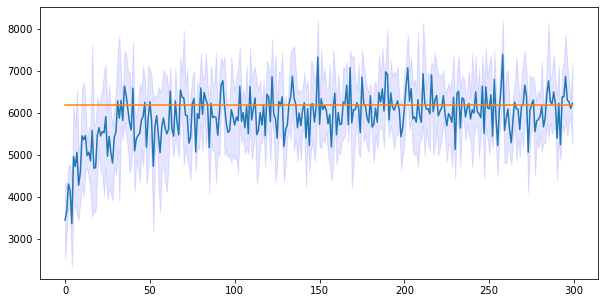

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

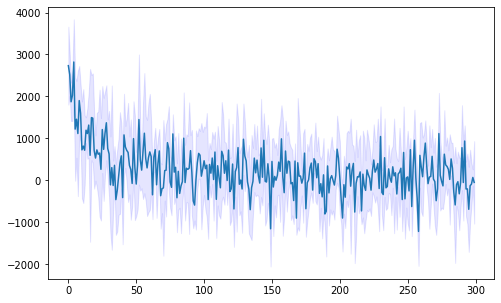

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

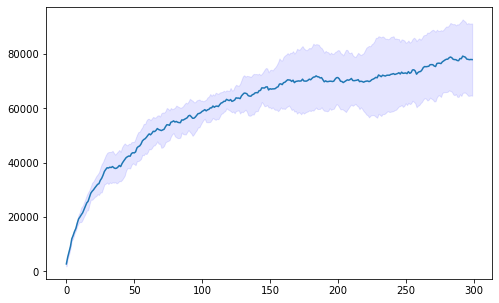

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()

TS

In [9]:
# set new believed customer for the learner
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))
    customer.set_probability_click(np.ones((n_products,n_products)))

In [ ]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts5_learner = TSLearner5(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts5_learner.select_superarm()
        report = environment.round(super_arm)
        ts5_learner.update(super_arm.copy(), report)
    rewards = ts5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
loading: [=                             ] 3.3%
loading: [==                            ] 6.7%
loading: [===                           ] 10.0%
loading: [====                          ] 13.3%
loading: [=====                         ] 16.7%
loading: [======                        ] 20.0%
loading: [=======                       ] 23.3%
loading: [========                      ] 26.7%
loading: [=========                     ] 30.0%
loading: [==========                    ] 33.3%
loading: [===========                   ] 36.7%
loading: [============                  ] 40.0%
loading: [=============                 ] 43.3%
loading: [==============                ] 46.7%
loading: [===============               ] 50.0%
loading: [================              ] 53.3%
loading: [=================             ] 56.7%
loading: [==================            ] 60.0%
loading: [===================           ] 63.3%
loading: [==================

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)

plt.show()

In [ ]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)

plt.show()

In [ ]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = (th_rews[-1] - th_rews[-2]) / today_customer
seen = np.array(ts5_learner.history_interactions)
theoretical_regret = 1024 * np.log(seen)/delta_arms

In [ ]:
plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.plot(range(len(theoretical_regret)), theoretical_regret)
plt.show()